In [1]:
!git clone https://github.com/ldkrsi/jieba-zh_TW.git
import sys
sys.path.append('/content/jieba-zh_TW')  # 路径1
import jieba
jieba.dt.cache_file = '/content/jieba-zh_TW.cache'

import os
if os.path.exists('/content/jieba-zh_TW/jieba'):
  !mv /content/jieba-zh_TW/jieba /content/jieba/
  print('Now Moved')
else:
  print('Moved')

Cloning into 'jieba-zh_TW'...
remote: Enumerating objects: 2320, done.
remote: Total 2320 (delta 0), reused 0 (delta 0), pack-reused 2320 (from 1)
Receiving objects: 100% (2320/2320), 44.97 MiB | 8.89 MiB/s, done.
Resolving deltas: 100% (1311/1311), done.
Now Moved


In [2]:
jieba.load_userdict('userdict.txt')

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /content/jieba-zh_TW.cache
DEBUG:jieba:Dumping model to file cache /content/jieba-zh_TW.cache
Loading model cost 1.059 seconds.
DEBUG:jieba:Loading model cost 1.059 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [3]:
jieba.set_dictionary('dict.txt')

In [20]:
sentence='今天胸部有一個腫塊，決定去醫院做乳腺超聲檢查，擔心是否有問題。'

In [21]:
####cut
import jieba

cut_jieba=[]
a = jieba.cut(sentence, cut_all=False)
cut_jieba.append(list(a))
print(f'精確: {cut_jieba}')

精確: [['今天', '胸部', '有', '一個', '腫塊', '，', '決定', '去', '醫院', '做', '乳腺', '超聲', '檢查', '，', '擔心', '是否', '有', '問題', '。']]


In [61]:
from gensim.models import Word2Vec
model = Word2Vec(cut_jieba, window=5, min_count=1, workers=4)
vocab = model.wv.index_to_key
vectors = model.wv[vocab]

In [62]:
vocab

['有',
 '，',
 '。',
 '去',
 '胸部',
 '一個',
 '腫塊',
 '決定',
 '醫院',
 '問題',
 '做',
 '乳腺',
 '超聲',
 '檢查',
 '擔心',
 '是否',
 '今天']

In [63]:
stopwords_file = "stopwords-zh-v2.txt"
stopwords = []
with open(stopwords_file, "r", encoding="utf-8") as f:
    for line in f:
        stopwords.append(line.strip())

filtered_vocab=[]
filtered_vectors=[]
for i,word in enumerate(vocab):
  if word not in stopwords:
    filtered_vocab.append(word)
    filtered_vectors.append(i)
# filtered_vocab = [word for word in vocab if word not in stopwords]
vocab=filtered_vocab
vectors=filtered_vectors

In [65]:
vectors

[4, 6, 7, 11, 12, 14, 15]

In [45]:
print(f'{np.array(vectors).shape} {np.array(vocab).shape}')

(7,) (7,)


In [43]:
print(f'{vectors} {vocab}')

[[-5.3622725e-04  2.3643136e-04  5.1033497e-03 ... -7.0415605e-03
   9.0145587e-04  6.3925339e-03]
 [-8.6196875e-03  3.6657380e-03  5.1898835e-03 ... -2.3915148e-03
  -9.5100943e-03  4.5058788e-03]
 [ 6.7389912e-05  3.0913700e-03 -6.8216962e-03 ...  5.1387330e-04
   8.2282713e-03 -7.0276577e-03]
 ...
 [ 7.6947287e-03  9.1213547e-03  1.1334816e-03 ...  8.2707042e-03
  -6.0943505e-03  9.4378302e-03]
 [-7.2069596e-03  4.2374614e-03  2.1565913e-03 ...  9.4407694e-03
   7.0676417e-03  6.7537352e-03]
 [ 1.2892577e-03 -9.8018562e-03  4.5825737e-03 ... -2.5871673e-03
  -7.7509470e-03  4.1910158e-03]] ['胸部', '腫塊', '決定', '乳腺', '超聲', '擔心', '是否']


In [36]:
from google.colab import drive
import pickle #把資料醃製(保存)起來

drive.mount('/content/gdrive')
loaded_model=pickle.load(open('/content/gdrive/MyDrive/KMeans_model0824.pkl','rb'))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
from sklearn.cluster import KMeans
test=loaded_model.fit_predict(vocab)
test

ValueError: could not convert string to float: '胸部'

In [ ]:
data = pd.DataFrame(list(zip(vocab,model.labels_)))
data.to_csv('test.csv')

In [ ]:
import numpy as np
print(f'{np.array(vectors).shape} {np.array(vocab).shape}')

(418, 100) (328,)


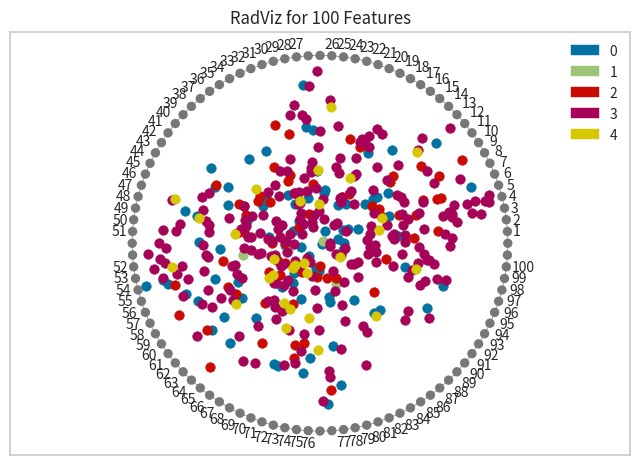

In [ ]:
from yellowbrick.features.radviz import radviz
X=np.array(vectors)
X=X**6  # 特徵縮放，因為若不平方，會看不出來
y=model.labels_
feature=[i for i in range(1, model.n_features_in_+1)]  # kmeans 的特徵總量
classes=[i for i in range(0, 5)]  # k-value
a=radviz(X,y,features=feature,classes=classes)

In [ ]:
import numpy as np
import plotly.graph_objects as go

def radviz_3d_plotly(X, y, n_features):
    num_points = X.shape[0]
    num_dims = n_features

    # Define spherical coordinates for dimensions
    theta = np.linspace(0, 2 * np.pi, num_dims, endpoint=False)
    phi = np.linspace(0, np.pi, num_dims, endpoint=False)

    # Convert spherical coordinates to Cartesian coordinates
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)

    # Initialize lists to store the coordinates
    point_x = []
    point_y = []
    point_z = []

    # Calculate the weighted average position on the sphere for each data point
    for i in range(num_points):
        weights = X[i, :]
        avg_x = np.sum(weights * x) / np.sum(weights)
        avg_y = np.sum(weights * y) / np.sum(weights)
        avg_z = np.sum(weights * z) / np.sum(weights)

        point_x.append(avg_x)
        point_y.append(avg_y)
        point_z.append(avg_z)

    # Create plotly figure
    fig = go.Figure()

    # Add scatter plot for data points
    fig.add_trace(go.Scatter3d(
        x=point_x,
        y=point_y,
        z=point_z,
        mode='markers',
        marker=dict(size=5, color=y, colorscale='Viridis', colorbar=dict(title='Class')),
        name='Data Points'
    ))

    # Add scatter plot for dimension points
    fig.add_trace(go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(size=10, color='red'),
        name='Feature Points'
    ))

    # Update layout for better appearance
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        title='3D Radviz Plot',
        showlegend=True
    )

    fig.show()

# Example usage
X = np.array(vectors)  # Your feature matrix
X = X ** 6  # Feature scaling
y = model.labels_  # Labels from your KMeans model
n_features = model.n_features_in_  # Number of features

radviz_3d_plotly(X, y, n_features)


In [ ]:
####繁體中文
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-08-24 10:36:13--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.215.113, 173.194.215.100, 173.194.215.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-08-24 10:36:13--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.215.132, 2607:f8b0:400c:c0c::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.215.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M   128MB/s    in 0.2s    

2024-08-24 